<a href="https://colab.research.google.com/github/dariashcherbakovaaa/MA_DSE_Unimi/blob/MultivariateStatistics/01_AMS_18_09_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## https://www.statsmodels.org/stable/index.html

## https://scikit-learn.org/stable/

In [14]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

#! pip install gcimpute

In [4]:
from sklearn import set_config
set_config(display='diagram')

In [5]:
from sklearn.datasets import fetch_openml

census = fetch_openml(data_id=1590, parser = 'auto')

census

{'data':        age     workclass  fnlwgt     education  education-num  \
 0       25       Private  226802          11th              7   
 1       38       Private   89814       HS-grad              9   
 2       28     Local-gov  336951    Assoc-acdm             12   
 3       44       Private  160323  Some-college             10   
 4       18           NaN  103497  Some-college             10   
 ...    ...           ...     ...           ...            ...   
 48837   27       Private  257302    Assoc-acdm             12   
 48838   40       Private  154374       HS-grad              9   
 48839   58       Private  151910       HS-grad              9   
 48840   22       Private  201490       HS-grad              9   
 48841   52  Self-emp-inc  287927       HS-grad              9   
 
            marital-status         occupation relationship   race     sex  \
 0           Never-married  Machine-op-inspct    Own-child  Black    Male   
 1      Married-civ-spouse    Farming-fishin

In [6]:
print(census.DESCR)

**Author**: Ronny Kohavi and Barry Becker  
**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/Adult) - 1996  
**Please cite**: Ron Kohavi, "Scaling Up the Accuracy of Naive-Bayes Classifiers: a Decision-Tree Hybrid", Proceedings of the Second International Conference on Knowledge Discovery and Data Mining, 1996  

Prediction task is to determine whether a person makes over 50K a year. Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

This is the original version from the UCI repository, with training and test sets merged.

### Variable description

Variables are all self-explanatory except __fnlwgt__. This is a proxy for the demographic background of the people: "People with similar demographic characteristics should have similar weights". This similarity-statement is not transferable across the 51 different states.

Description f

In [7]:
census.data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [8]:
census.target

0        <=50K
1        <=50K
2         >50K
3         >50K
4        <=50K
         ...  
48837    <=50K
48838     >50K
48839    <=50K
48840    <=50K
48841     >50K
Name: class, Length: 48842, dtype: category
Categories (2, object): ['<=50K', '>50K']

In [9]:
census = census.frame

In [10]:
census.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             48842 non-null  int64   
 1   workclass       46043 non-null  category
 2   fnlwgt          48842 non-null  int64   
 3   education       48842 non-null  category
 4   education-num   48842 non-null  int64   
 5   marital-status  48842 non-null  category
 6   occupation      46033 non-null  category
 7   relationship    48842 non-null  category
 8   race            48842 non-null  category
 9   sex             48842 non-null  category
 10  capital-gain    48842 non-null  int64   
 11  capital-loss    48842 non-null  int64   
 12  hours-per-week  48842 non-null  int64   
 13  native-country  47985 non-null  category
 14  class           48842 non-null  category
dtypes: category(9), int64(6)
memory usage: 2.7 MB


(array([37155.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 11687.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

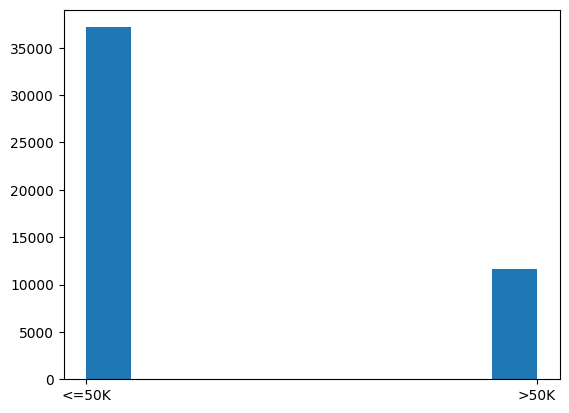

In [12]:
plt.hist(census['class'])

<ipython-input-27-08998163d300>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = census.corr() # correlation matrix


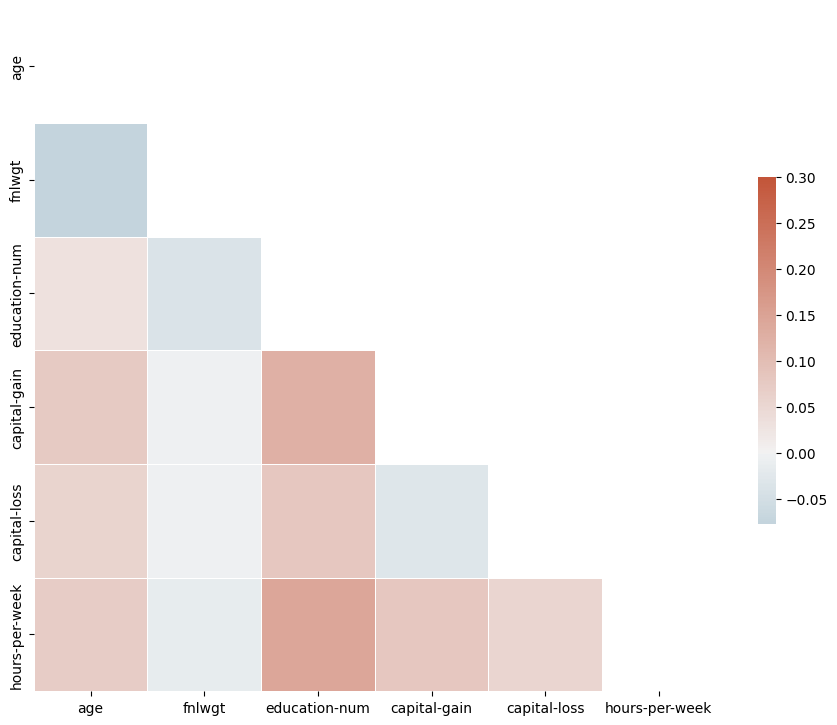

In [27]:
corr = census.corr() # correlation matrix

mask = np.triu(np.ones_like(corr, dtype = bool)) # generate a mask for the upper triangle

f, ax = plt.subplots(figsize = (11,9))

cmap = sns.diverging_palette(230, 20, as_cmap=True) # custom diverging colormap

corrplot = sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    vmax=.3,
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={'shrink':.5}
)

In [28]:
target_name = "class"

target = census[target_name]
data = census.drop(columns = target_name)

In [29]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    census.drop(columns = 'class'), census['class'], random_state = 42, test_size=0.25
)
data_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
27859,41,NaN,27187,Assoc-voc,11,Married-civ-spouse,NaN,Husband,White,Male,0,2415,12,United-States
5654,39,Private,319052,Bachelors,13,Married-civ-spouse,Handlers-cleaners,Wife,Asian-Pac-Islander,Female,0,0,37,Philippines
3779,34,Private,260560,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States
10522,56,Self-emp-not-inc,368797,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States
22461,71,Self-emp-not-inc,163293,Prof-school,15,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,2,United-States


In [18]:
from sklearn.linear_model import LogisticRegression

In [20]:
logreg = LogisticRegression(random_state = 42, max_iter= 500)
logreg

LogisticRegression(max_iter=500, random_state=42)

In [30]:
_ = logreg.fit(data_train, target_train)

ValueError: ignored

In [31]:
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler

numerical_selector = selector(dtype_exclude = 'category')
categorical_selector = selector(dtype_include = 'category')

In [32]:
numerical_columns = numerical_selector(data)
categorical_columns = categorical_selector(data)

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore", sparse=False)
numerical_preprocessor = StandardScaler()

In [34]:
pd.get_dummies(data) # out of our controll
pd.get_dummies(data_train)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
27859,41,27187,11,0,2415,12,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5654,39,319052,13,0,0,37,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3779,34,260560,13,0,0,50,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
10522,56,368797,14,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
22461,71,163293,15,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,36,635913,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
44732,34,107624,10,0,0,50,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
38158,28,250135,10,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
860,46,96652,11,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [35]:
data_train.select_dtypes('int64').apply(lambda col: (col - col.mean()) / col.std())

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
27859,0.171768,-1.538786,0.358684,-0.144506,5.711807,-2.288422
5654,0.026057,1.225121,1.136851,-0.144506,-0.220248,-0.276180
3779,-0.338222,0.671213,1.136851,-0.144506,-0.220248,0.770186
10522,1.264605,1.696197,1.525934,-0.144506,-0.220248,-0.034711
22461,2.357441,-0.249887,1.915018,-0.144506,-0.220248,-3.093319
...,...,...,...,...,...,...
11284,-0.192511,4.225736,-0.419483,-0.144506,-0.220248,-0.034711
44732,-0.338222,-0.777062,-0.030399,-0.144506,-0.220248,0.770186
38158,-0.775357,0.572490,-0.030399,-0.144506,-0.220248,-0.034711
860,0.536047,-0.880965,0.358684,-0.144506,-0.220248,-0.034711


In [ ]:
census[['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'class']]

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,class
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
4,NaN,Some-college,Never-married,NaN,Own-child,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
48837,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
48838,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
48839,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
48840,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

column_processor = ColumnTransformer(
    transformers = [
        ('categories', categorical_preprocessor, categorical_selector),
        ('numerical', numerical_preprocessor, numerical_selector)
    ]
)

logreg_pipleline = Pipeline(
    steps  = [
        ("Preprocessing", column_processor),
        ("Logistic_reg", logreg)
    ]
)

logreg_pipleline

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('categories',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x78906ff77b80>),
                                                 ('numerical', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x789070098640>)])),
                ('Logistic_reg',
                 LogisticRegression(max_iter=500, random_state=42))])

In [37]:
_ = logreg_pipleline.fit(data_train, target_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [39]:
logreg_pipleline.predict(data_test[:5])

array(['<=50K', '<=50K', '>50K', '<=50K', '>50K'], dtype=object)

In [40]:
target_test[:5].values

['<=50K', '<=50K', '>50K', '<=50K', '<=50K']
Categories (2, object): ['<=50K', '>50K']

In [42]:
accuracy = logreg_pipleline.score(data_test, target_test)
print(f"Accuracy of logistic regression: {accuracy:.3f}")

Accuracy of logistic regression: 0.859
